In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\Users\b.Yuva Shree\Downloads\archive (11)\IRIS.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

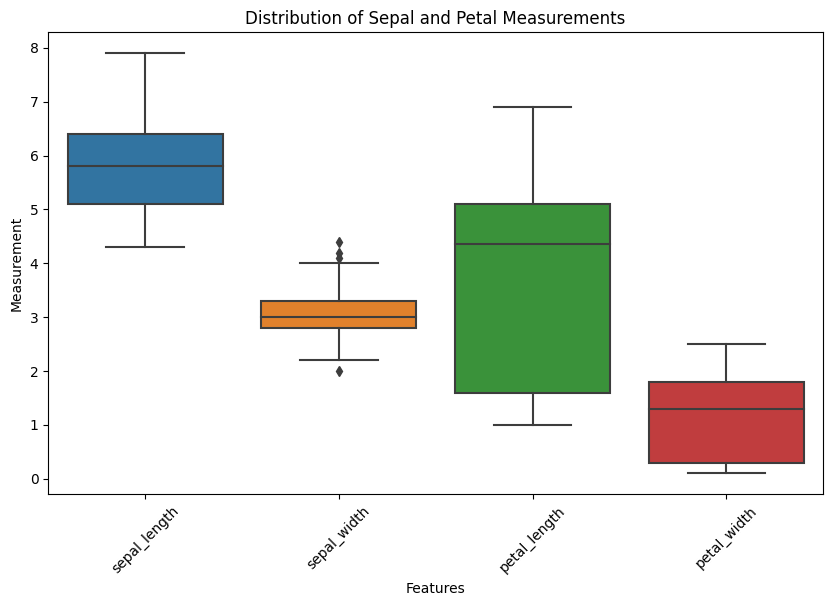

In [10]:
# Boxplot to visualize the distribution of each numerical feature
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
plt.title('Distribution of Sepal and Petal Measurements')
plt.xlabel('Features')
plt.ylabel('Measurement')
plt.xticks(rotation=45)
plt.show()

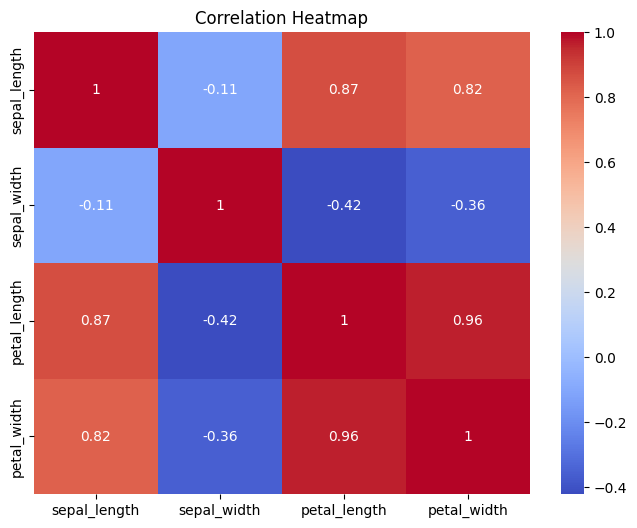

In [17]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

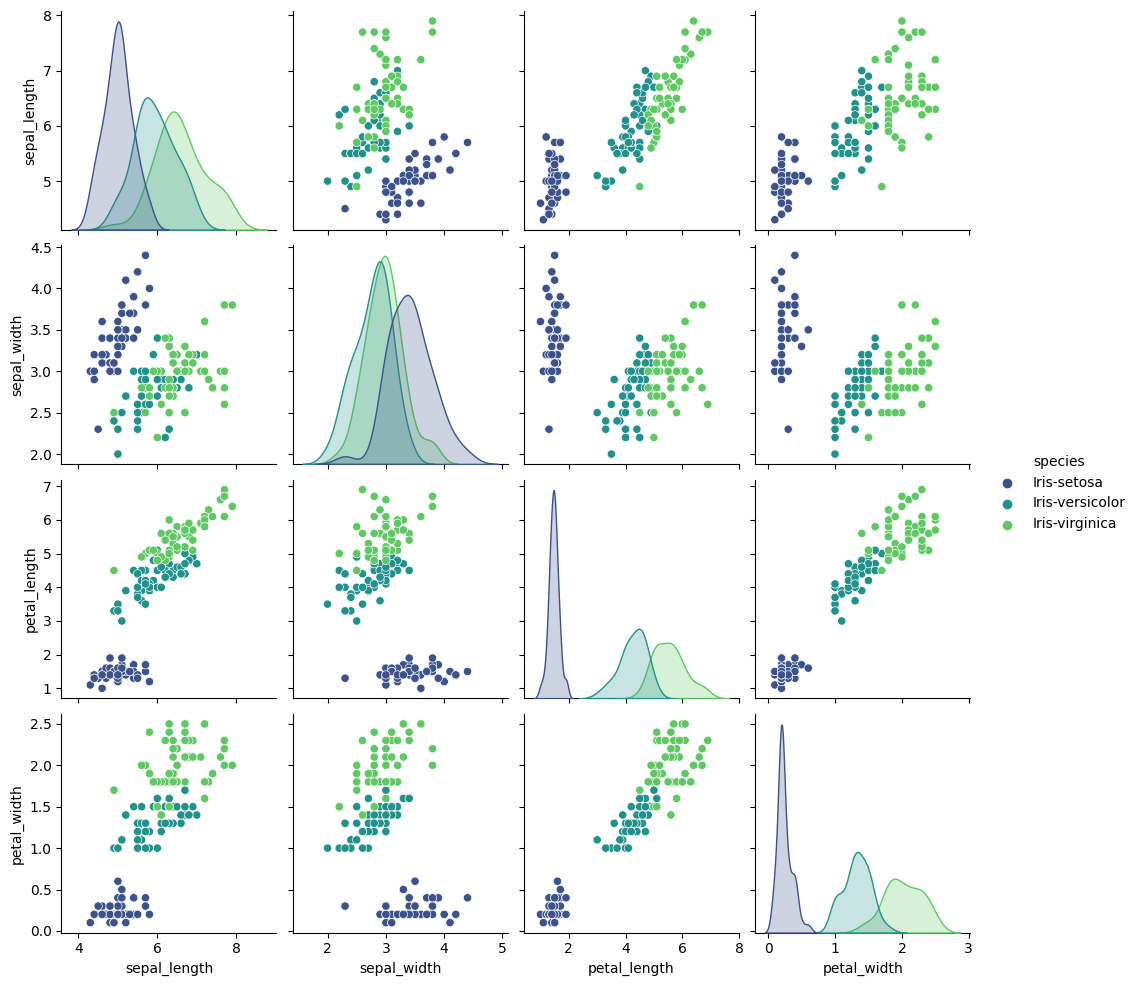

In [13]:
sns.pairplot(df, hue='species', palette='viridis')
plt.show()

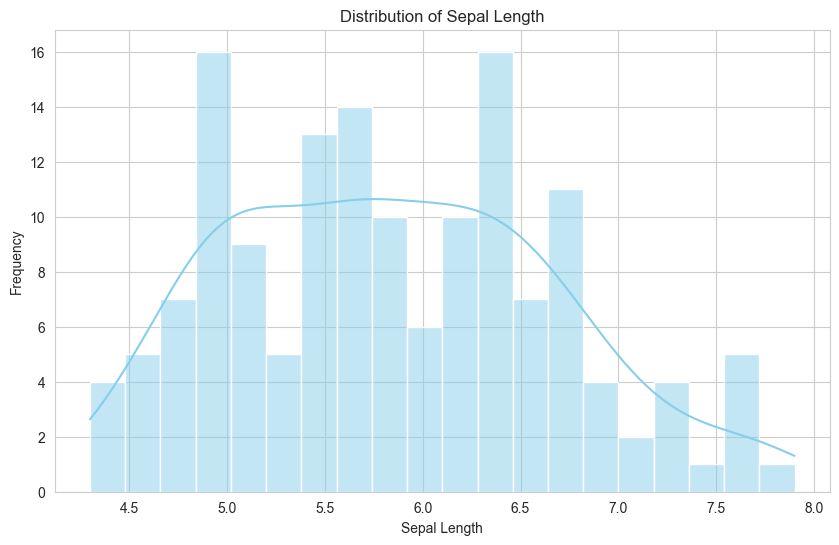

In [21]:
sns.set_style("whitegrid")
# Plot histogram for sepal length
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='sepal_length', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Sepal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.show()

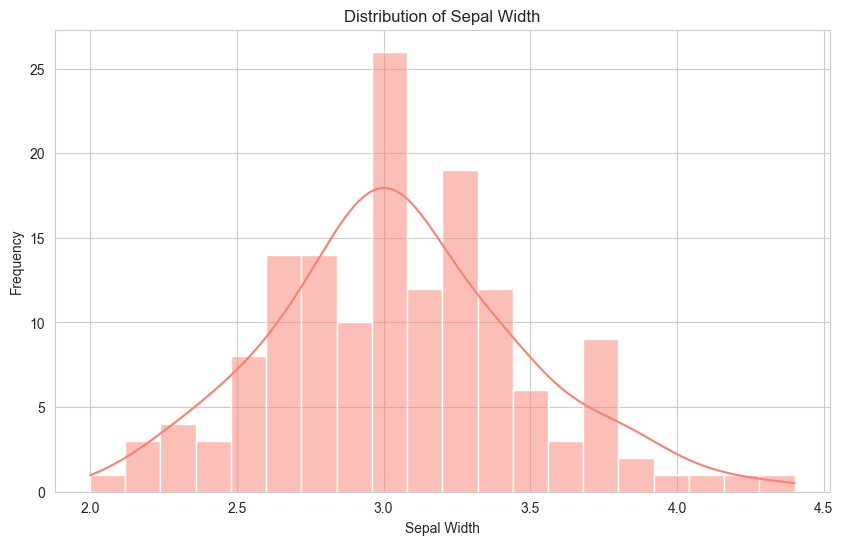

In [23]:
# Plot histogram for sepal width
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='sepal_width', bins=20, kde=True, color='salmon')
plt.title('Distribution of Sepal Width')
plt.xlabel('Sepal Width')
plt.ylabel('Frequency')
plt.show()

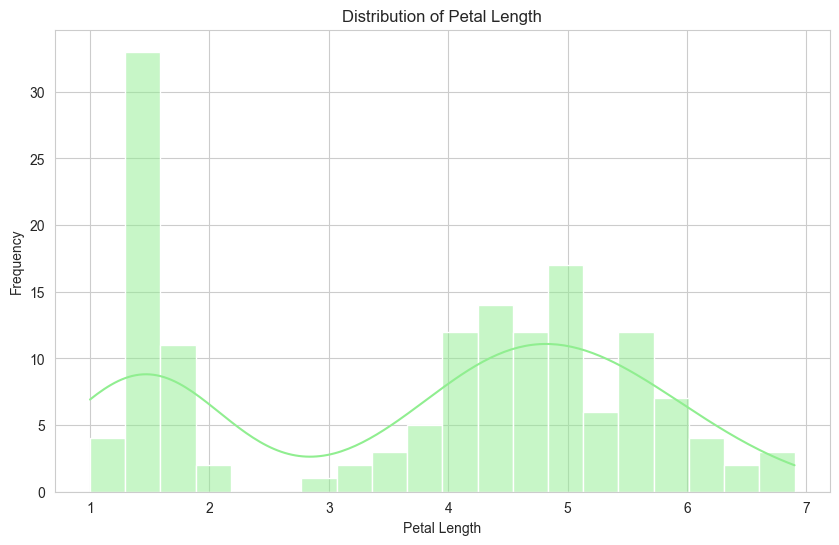

In [24]:
# Plot histogram for petal length
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='petal_length', bins=20, kde=True, color='lightgreen')
plt.title('Distribution of Petal Length')
plt.xlabel('Petal Length')
plt.ylabel('Frequency')
plt.show()

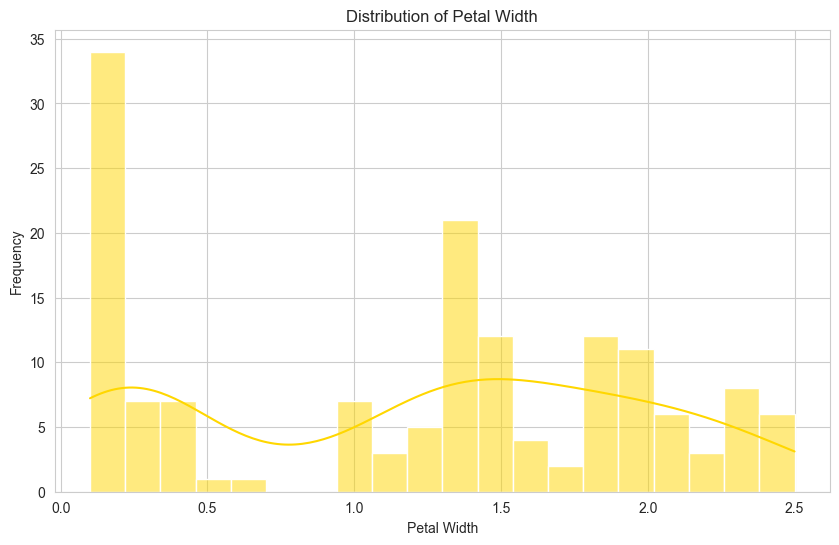

In [25]:
# Plot histogram for petal width
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='petal_width', bins=20, kde=True, color='gold')
plt.title('Distribution of Petal Width')
plt.xlabel('Petal Width')
plt.ylabel('Frequency')
plt.show()

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    df[i]=le.fit_transform(df[i])

In [27]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,8,14,4,1,0
1,6,9,4,1,0
2,4,11,3,1,0
3,3,10,5,1,0
4,7,15,4,1,0


In [28]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,24,9,28,19,2
146,20,4,26,15,2
147,22,9,28,16,2
148,19,13,30,19,2
149,16,9,27,14,2


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = df.drop("species", axis=1)  # Features
y = df["species"]  # Target variable

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (120, 4) (120,)
Testing set shape: (30, 4) (30,)


In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [57]:
dt_classifier = DecisionTreeClassifier(random_state=42)

In [58]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [59]:
y_pred_dt = dt_classifier.predict(X_test)

In [60]:
print(y_pred_dt)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [61]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)
matrix_dt = confusion_matrix(y_test, y_pred_dt)

In [62]:
print("Decision Tree Classifier Evaluation:")
print(f"Accuracy: {accuracy_dt:.2f}")
print("Classification Report:\n", report_dt)
print("Confusion Matrix:\n", matrix_dt)

Decision Tree Classifier Evaluation:
Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [65]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [66]:
y_pred_rf = rf_classifier.predict(X_test)

In [67]:
print(y_pred_rf)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [68]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
matrix_rf = confusion_matrix(y_test, y_pred_rf)

In [69]:
# Print the evaluation metrics for the Random Forest classifier
print("Random Forest Classifier Evaluation:")
print(f"Accuracy: {accuracy_rf:.2f}")
print("Classification Report:\n", report_rf)
print("Confusion Matrix:\n", matrix_rf)

Random Forest Classifier Evaluation:
Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [70]:
from sklearn.svm import SVC

In [71]:
svc_classifier = SVC(kernel='rbf', random_state=42)

In [72]:
svc_classifier.fit(X_train, y_train)

SVC(random_state=42)

In [73]:
y_pred_svc = svc_classifier.predict(X_test)

In [74]:
print(y_pred_svc)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [75]:
accuracy_svc = accuracy_score(y_test, y_pred_svc)
report_svc = classification_report(y_test, y_pred_svc)
matrix_svc = confusion_matrix(y_test, y_pred_svc)

In [76]:
print("Support Vector Classifier Evaluation:")
print(f"Accuracy: {accuracy_svc:.2f}")
print("Classification Report:\n", report_svc)
print("Confusion Matrix:\n", matrix_svc)

Support Vector Classifier Evaluation:
Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

In [79]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [80]:
y_pred_knn = knn_classifier.predict(X_test)

In [81]:
print(y_pred_knn)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [82]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
matrix_knn = confusion_matrix(y_test, y_pred_knn)

In [83]:
print("k-Nearest Neighbors Classifier Evaluation:")
print(f"Accuracy: {accuracy_knn:.2f}")
print("Classification Report:\n", report_knn)
print("Confusion Matrix:\n", matrix_knn)

k-Nearest Neighbors Classifier Evaluation:
Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)

In [86]:
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [87]:
y_pred_log_reg = log_reg.predict(X_test)

In [88]:
print(y_pred_log_reg)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [89]:
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
report_log_reg = classification_report(y_test, y_pred_log_reg)
matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

In [90]:
print("Logistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy_log_reg:.2f}")
print("Classification Report:\n", report_log_reg)
print("Confusion Matrix:\n", matrix_log_reg)

Logistic Regression Model Evaluation:
Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
